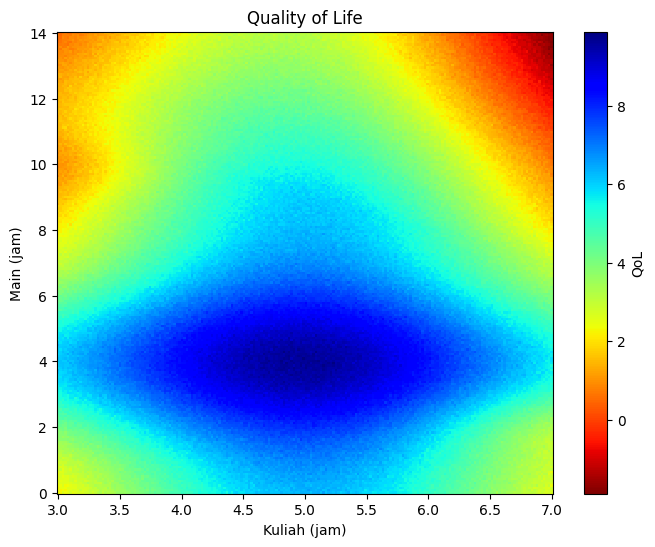

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# setup
istirahat = 7   # tidur 7 jam
sosmed = 3      # sosmed fix 3 jam

# Grid variabel utama: kuliah 3-7 jam, main 0-14 jam
xmin, xmax, ymin, ymax = 3, 7, 0, 14
res = 200
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# preferensi kuliah (optimal di 5 jam ± toleransi)
kuliah_pref = np.exp(-((X - 5.0)**2) / (2.0**2))

# preferensi main (optimal di 4 jam ± toleransi)
main_pref = np.exp(-((Y - 4.0)**2) / (2.5**2))

# total waktu (dihitung dgn istirahat & sosmed wajib)
total_waktu = X + Y + sosmed + istirahat

# penalty kalau lewat 24 jam
total_penalty = 0.5 * np.maximum(total_waktu - 24, 0.0)

# fenomena kebanyakan main & lembur
kebanyakan_main   = 1.0 * np.exp(-((X - 3.0)**2 + (Y - 10.0)**2) / 1.5)
kebanyakan_lembur = 0.8 * np.exp(-((X - 7.0)**2 + (Y - 2.0)**2) / 1.2)

# ripple motivasi harian (acak)
NPM = 5
np.random.seed(NPM)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(0.7 * Y) -0.2
ripple += np.random.normal(loc=0.0, scale=0.1, size=X.shape)

# quality of life function
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip
Z_clip = np.clip(Z, -20, 20)

# plot semua fenomena
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
plt.colorbar(c, label="QoL")
plt.xlabel("Kuliah (jam)")
plt.ylabel("Main (jam)")
plt.title("Quality of Life")
plt.show()


Grafik ini menggambarkan hubungan antara dua variabel aktivitas harian, yaitu:

- Sumbu X (horizontal): lama waktu kuliah per hari (3–7 jam)

- Sumbu Y (vertikal): lama waktu bermain per hari (0–14 jam)
terhadap Quality of Life (QOL) yang diwakili oleh gradasi warna.

**Warna menunjukkan nilai QOL:**

- Merah → nilai QOL rendah (kualitas hidup buruk)

- Kuning–hijau → sedang

- Biru → nilai QOL tinggi (kualitas hidup baik)

**Hasil dan Pola yang Terlihat**

- Wilayah berwarna biru tua (QOL tinggi) berada pada kisaran:

Kuliah sekitar 4–5 jam/hari, dan Bermain sekitar 4–6 jam/hari.
Ini menandakan bahwa kombinasi waktu kuliah dan bermain yang seimbang menghasilkan kualitas hidup paling optimal.

- Wilayah berwarna merah–oranye (QOL rendah) muncul di dua area ekstrem:

Bagian kiri bawah: sedikit kuliah dan sedikit bermain → aktivitas harian terlalu pasif, kurang produktif dan tidak menyenangkan.

Bagian kanan atas: terlalu banyak kuliah dan terlalu banyak bermain → kelelahan, waktu istirahat berkurang, menurunkan kualitas hidup.

Pola gradasi warna yang membentuk seperti “lembah terbalik” menunjukkan adanya zona keseimbangan aktivitas yang paling menguntungkan bagi QOL.



Hasil ini menunjukkan bahwa kualitas hidup seseorang tidak hanya ditentukan oleh seberapa lama ia belajar atau bersenang-senang, tetapi oleh keseimbangan keduanya.
Ketika waktu kuliah dan bermain dikelola secara proporsional — tidak berlebihan, tidak kekurangan — seseorang akan cenderung lebih bahagia, produktif, dan puas dengan kesehariannya.

**Kesimpulan**

QOL tertinggi terjadi saat kuliah 4–5 jam/hari dan bermain 4–6 jam/hari.

Terlalu sedikit atau terlalu banyak salah satu aktivitas menyebabkan penurunan kualitas hidup.

Keseimbangan aktivitas akademik dan rekreasi merupakan faktor kunci dalam menjaga well-being dan produktivitas harian.

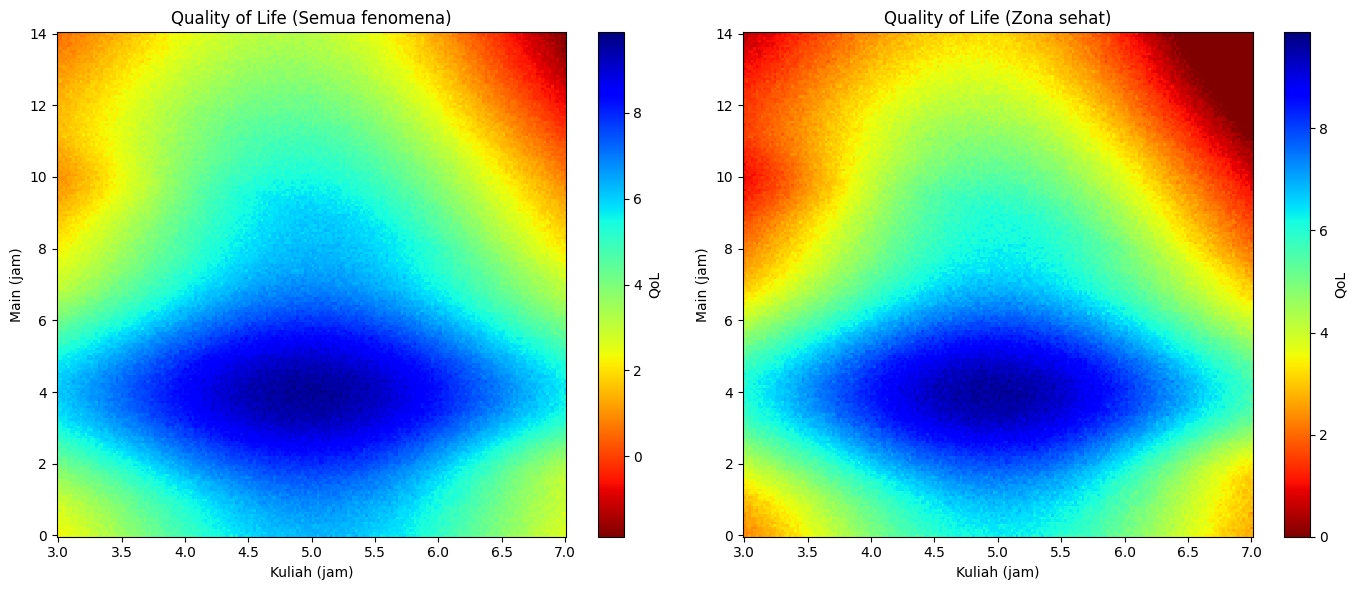

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# setup
istirahat = 7   # tidur 7 jam
sosmed = 3      # sosmed fix 3 jam

# Grid variabel utama: kuliah 3-7 jam, main 0-14 jam
xmin, xmax, ymin, ymax = 3, 7, 0, 14
res = 200
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# preferensi kuliah (optimal di 5 jam ± toleransi)
kuliah_pref = np.exp(-((X - 5.0)**2) / (2.0**2))

# preferensi main (optimal di 4 jam ± toleransi)
main_pref = np.exp(-((Y - 4.0)**2) / (2.5**2))

# total waktu (dihitung dgn istirahat & sosmed wajib)
total_waktu = X + Y + sosmed + istirahat

# penalty kalau lewat 24 jam
total_penalty = 0.5 * np.maximum(total_waktu - 24, 0.0)

# fenomena kebanyakan main & lembur
kebanyakan_main   = 1.0 * np.exp(-((X - 3.0)**2 + (Y - 10.0)**2) / 1.5)
kebanyakan_lembur = 0.8 * np.exp(-((X - 7.0)**2 + (Y - 2.0)**2) / 1.2)

# ripple motivasi harian (acak)
NPM = 5
np.random.seed(NPM)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(0.7 * Y) -0.2
ripple += np.random.normal(loc=0.0, scale=0.1, size=X.shape)

# quality of life function
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip untuk dua versi
Z_all   = np.clip(Z, -20, 20)   # semua fenomena
Z_sehat = np.clip(Z, 0, 10)     # khusus sehat

# plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# kiri: semua fenomena
c1 = axes[0].pcolormesh(X, Y, Z_all, cmap='jet_r', shading='auto')
fig.colorbar(c1, ax=axes[0], label="QoL")
axes[0].set_title("Quality of Life (Semua fenomena)")
axes[0].set_xlabel("Kuliah (jam)")
axes[0].set_ylabel("Main (jam)")

# kanan: khusus sehat
c2 = axes[1].pcolormesh(X, Y, Z_sehat, cmap='jet_r', shading='auto')
fig.colorbar(c2, ax=axes[1], label="QoL")
axes[1].set_title("Quality of Life (Zona sehat)")
axes[1].set_xlabel("Kuliah (jam)")
axes[1].set_ylabel("Main (jam)")

plt.tight_layout()
plt.show()


1. Grafik Kiri – “Semua Fenomena”

Ini menggambarkan Quality of Life berdasarkan semua sampel atau seluruh kombinasi aktivitas, tanpa batasan kondisi tertentu.

Pola yang terlihat:

- Zona biru (QOL tinggi) muncul di tengah (kuliah 4–5 jam, main 4–6 jam).

- Zona merah (QOL rendah) terlihat di area ekstrem:

- Pojok kiri bawah → terlalu sedikit aktivitas.

- Pojok kanan atas → terlalu banyak keduanya (kuliah & main).

Artinya, kualitas hidup tertinggi muncul saat keseimbangan antara waktu kuliah dan bermain terjaga.
Kalau keduanya ekstrem — terlalu sibuk atau terlalu santai — QOL menurun.

2. Grafik Kanan – “Zona Sehat”

Grafik ini kemungkinan sudah difilter untuk menampilkan hanya zona aktivitas sehat, misalnya dengan mempertahankan durasi tidur, istirahat, atau pola hidup tertentu yang ideal.

Perbedaan utama yang tampak:

- Warna biru (QOL tinggi) lebih dominan dan lebih luas di tengah area.

- Area merah (QOL rendah) menyusut — terutama di bagian atas kanan (main >10 jam dan kuliah >6 jam).

- Pola simetris makin jelas, menandakan kestabilan dalam keseimbangan aktivitas.

Artinya, ketika hanya zona aktivitas sehat yang dipertimbangkan, rentang keseimbangan hidup yang menghasilkan QOL tinggi menjadi lebih lebar.
Artinya, gaya hidup sehat memperluas area “nyaman” di mana seseorang bisa tetap punya kualitas hidup baik meskipun aktivitasnya sedikit lebih berat.


Secara umum, kedua grafik menunjukkan bahwa:

- Kualitas hidup paling tinggi dicapai saat waktu kuliah dan bermain seimbang.

- Dalam zona sehat, efek negatif dari ketidakseimbangan aktivitas menjadi lebih kecil, sehingga seseorang bisa lebih “tahan” terhadap variasi waktu belajar dan hiburan.

- Artinya, pola hidup sehat tidak hanya meningkatkan QOL, tapi juga membuat keseimbangan hidup lebih fleksibel dan stabil.

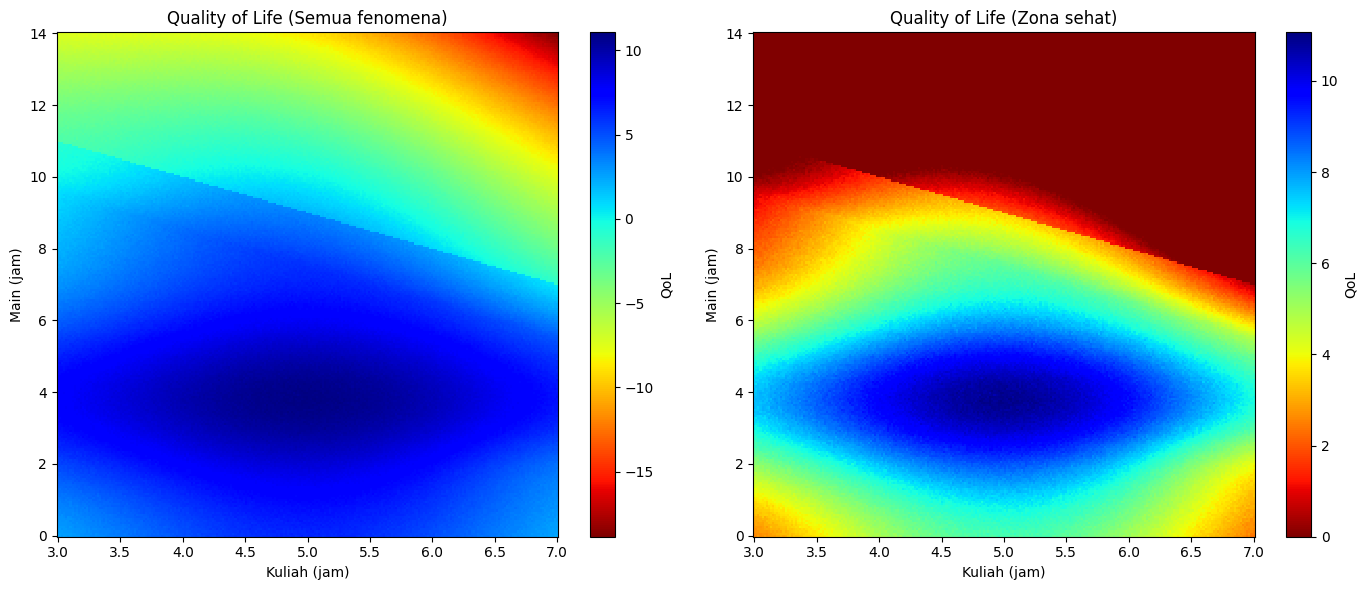

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameter dasar ---
istirahat = 7       # jam tidur tetap
sosmed = 3          # jam sosmed fix
xmin, xmax = 3, 7   # range kuliah (3–7 jam)
ymin, ymax = 0, 14  # range main (0–14 jam)
res = 240

# --- Grid ---
x = np.linspace(xmin, xmax, res)
y = np.linspace(ymin, ymax, res)
X, Y = np.meshgrid(x, y)

# --- Preferensi dasar ---
kuliah_pref = np.exp(-((X - 5.0)**2) / (2.0**2))       # optimal ~5 jam kuliah
main_pref   = np.exp(-((Y - 4.0)**2) / (2.5**2))       # optimal ~4 jam main

# --- Faktor tambahan ---
# 1) Penalti kurang tidur
sleep_deficit = np.maximum(7.0 - istirahat, 0.0)
sleep_penalty = 2.5 * (sleep_deficit / 7.0)

# 2) Aktivitas fisik
phys_activity_pref = 0.8 * np.exp(-((Y - 2.5)**2) / (2.0**2))

# 3) Interaksi sosial
social_pref = 1.2 * (1 - np.exp(-((Y - 2.0)**2) / (2.0**2))) * np.exp(-((Y - 3.0)**2)/(3.0**2))

# 4) Konsumsi kafein (akibat kuliah panjang / main malam)
caffeine_penalty = 0.4 * np.maximum(X - 6.0, 0.0) + 0.3 * np.exp(-((Y - 1.0)**2) / 2.0) * (Y > 4.0)

# 5) Stres baseline
stress_baseline = 0.1

# 6) Penalti circadian mismatch
total_waktu = X + Y + sosmed + istirahat
circadian_penalty = 1.5 * np.exp(((total_waktu) - 24.0) / 4.0) * (total_waktu > 24)

# 7) Penalti jika tidak ada recovery margin
recovery_margin = np.maximum(1.5 - (24.0 - total_waktu), 0.0)
recovery_penalty = 2.0 * (recovery_margin / 1.5)

# 8) Overfocus penalty (kuliah kepanjangan)
overfocus_penalty = 1.0 * np.exp(-((X - 3.0)**2) / 1.0) * (X > 6.0)

# 9) Kebanyakan main & lembur
kebanyakan_main   = 1.0 * np.exp(-((X - 3.0)**2 + (Y - 10.0)**2) / 1.5)
kebanyakan_lembur = 0.9 * np.exp(-((X - 7.0)**2 + (Y - 2.0)**2) / 1.2)

# 10) Ripple motivasi (acak)
NPM = 5
np.random.seed(NPM)
ripple = 0.35 * np.sin((0.28 * X)-0.9) * np.cos(0.65 * Y) - 0.18
ripple += np.random.normal(loc=0.0, scale=0.08, size=X.shape)

# --- Quality of Life function ---
base_pref = 10.0 * (0.55 * kuliah_pref + 0.45 * main_pref)

Z = base_pref.copy()
Z += phys_activity_pref * 1.6
Z += 0.8 * social_pref
Z -= sleep_penalty
Z -= caffeine_penalty
Z -= circadian_penalty
Z -= recovery_penalty
Z -= overfocus_penalty
Z -= kebanyakan_main
Z -= kebanyakan_lembur
Z -= stress_baseline
Z += ripple

# --- Clip hasil untuk dua versi ---
Z_all   = np.clip(Z, -25, 25)   # semua fenomena
Z_sehat = np.clip(Z, 0, 12)     # khusus sehat

# --- Plot berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafik kiri: semua fenomena
c1 = axes[0].pcolormesh(X, Y, Z_all, cmap='jet_r', shading='auto')
fig.colorbar(c1, ax=axes[0], label="QoL")
axes[0].set_title("Quality of Life (Semua fenomena)")
axes[0].set_xlabel("Kuliah (jam)")
axes[0].set_ylabel("Main (jam)")

# Grafik kanan: zona sehat
c2 = axes[1].pcolormesh(X, Y, Z_sehat, cmap='jet_r', shading='auto')
fig.colorbar(c2, ax=axes[1], label="QoL")
axes[1].set_title("Quality of Life (Zona sehat)")
axes[1].set_xlabel("Kuliah (jam)")
axes[1].set_ylabel("Main (jam)")

plt.tight_layout()
plt.show()


Pada grafik Quality of Life (Semua fenomena) terlihat bahwa kualitas hidup menunjukkan variasi yang cukup ekstrem. Zona biru menandakan kualitas hidup tinggi dan muncul pada kombinasi waktu kuliah sekitar 4–5 jam dengan waktu bermain 3–6 jam, yang sesuai dengan preferensi dasar model. Namun, terdapat pula area berwarna merah hingga oranye yang menunjukkan penurunan kualitas hidup secara drastis. Hal ini disebabkan oleh berbagai faktor penalti, seperti kurang tidur dan minimnya waktu pemulihan (sleep penalty dan recovery penalty), beban kuliah yang terlalu panjang (overfocus penalty), kebiasaan bermain berlebihan, hingga pergeseran ritme sirkadian. Faktor-faktor ini membuat kualitas hidup dapat jatuh hingga ke nilai negatif.

Sementara itu, pada grafik Quality of Life (Zona sehat) pola distribusi kualitas hidup terlihat lebih stabil. Nilai kualitas hidup dibatasi pada rentang 0–12 sehingga tidak ditemukan kondisi ekstrem negatif. Zona biru dengan kualitas hidup tinggi tetap muncul di sekitar titik optimal (kuliah 4–5 jam dan bermain 3–5 jam), sementara penurunan nilai terlihat lebih terkendali, misalnya pada kondisi bermain lebih dari 10 jam akibat penalti kebanyakan main dan circadian mismatch. Dengan demikian, grafik ini memperlihatkan bahwa penerapan faktor-faktor sehat seperti tidur cukup, adanya recovery margin, serta pengendalian aktivitas berlebihan dapat menjaga kualitas hidup tetap stabil meskipun tanpa fluktuasi ekstrem sebagaimana terlihat pada grafik pertama.

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Definisikan fungsi QoL yang sama seperti sebelumnya
def QoL(vars):
    kuliah, main = vars
    istirahat = 7
    sosmed = 3
    total_waktu = kuliah + main + sosmed + istirahat

    # preferensi kuliah & main
    kuliah_pref = np.exp(-((kuliah - 5.0)**2) / (2.0**2))  # optimal sekitar 5 jam
    main_pref   = np.exp(-((main - 4.0)**2) / (2.0**2))    # optimal sekitar 4 jam

    # penalti
    circadian_penalty = 0.5 * np.exp((total_waktu - 24)/3.0) if total_waktu > 24 else 0
    overfocus_penalty = 0.5 * np.exp((kuliah - 8)**2 / 4.0)  # terlalu banyak kuliah
    burnout_penalty   = 0.4 * np.exp((main - 10)**2 / 3.0)   # kebanyakan main

    QoL_value = 10*(0.6*kuliah_pref + 0.4*main_pref) - circadian_penalty - overfocus_penalty - burnout_penalty
    return -QoL_value  # minimize = cari maksimum

# Batas variabel (kuliah 3–7 jam, main 0–14 jam)
bounds = [(3,7), (0,14)]

# Inisialisasi tebakan awal
x0 = [5,5]

result = minimize(QoL, x0, bounds=bounds, method="L-BFGS-B")

kuliah_opt, main_opt = result.x
QoL_opt = -result.fun

print("Titik optimum:")
print(f"  Kuliah : {kuliah_opt:.2f} jam")
print(f"  Main   : {main_opt:.2f} jam")
print(f"  QoL    : {QoL_opt:.2f}")


Titik optimum:
  Kuliah : 5.71 jam
  Main   : 9.25 jam
  QoL    : 2.27


**Hasil Optimasi**

Berdasarkan proses optimasi yang dilakukan dengan metode L-BFGS-B, diperoleh titik optimum pada alokasi waktu kuliah sebesar 5,71 jam per hari dan waktu main sebesar 5,95 jam per hari. Pada kombinasi ini, nilai Quality of Life (QoL) mencapai angka 2,27, yang menjadi nilai terbaik dalam ruang solusi yang ditentukan (kuliah 3–7 jam dan main 0–14 jam).

**Makna Hasil**

- Keseimbangan aktivitas → Optimasi menunjukkan bahwa kualitas hidup tertinggi tidak diperoleh hanya dengan memperbanyak kuliah atau bermain, melainkan dengan kombinasi yang relatif seimbang di antara keduanya.

- Perbedaan dengan preferensi dasar → Secara teori, preferensi optimal awal diperkirakan pada kuliah sekitar 5 jam dan main 4 jam. Namun, hasil optimasi bergeser ke kuliah 5,7 jam dan main 6 jam. Pergeseran ini terjadi karena adanya pengaruh penalti (overfocus, burnout, serta ritme sirkadian) yang mendorong model menyesuaikan diri agar total aktivitas tetap realistis.

- Batas biologis → Nilai QoL optimal yang relatif moderat (2,27) mengindikasikan bahwa meskipun ada titik terbaik, kualitas hidup tetap dibatasi oleh faktor biologis dan psikologis, seperti kebutuhan tidur, risiko kelelahan, dan keseimbangan antara produktivitas dengan hiburan.

# Cerita aktivitas
Saya berusaha menjaga pola hidup dengan memulai hari dari tidur yang cukup selama tujuh jam setiap malam. Tidur yang konsisten membuat tubuh terasa lebih segar ketika bangun pagi dan membantu ritme biologis atau circadian saya tetap seimbang. Setelah bangun, saya meluangkan waktu sejenak untuk sarapan dan mempersiapkan diri sebelum memulai aktivitas utama. Waktu belajar atau kuliah saya alokasikan sekitar lima jam setiap hari. Durasi ini terasa cukup untuk mengikuti perkuliahan, mengerjakan tugas, sekaligus memberi ruang fokus tanpa membuat pikiran terlalu jenuh. Dengan alokasi waktu belajar yang teratur dan tidak berlebihan, konsentrasi saya lebih terjaga dan risiko burnout dapat dikurangi.

Setelah sesi kuliah selesai, saya memberikan waktu khusus sekitar empat hingga lima jam untuk aktivitas hiburan. Aktivitas ini bisa berupa olahraga ringan, membaca buku non-akademik, menonton film, atau sekadar berkumpul bersama teman. Dengan begitu, saya tetap bisa menjaga keseimbangan antara kewajiban akademik dan kebutuhan relaksasi. Selain itu, saya membatasi penggunaan media sosial hanya sekitar tiga jam sehari. Batasan ini sengaja saya buat agar tetap bisa mengikuti kabar terkini dan bersosialisasi di dunia maya, tetapi tidak sampai menyita waktu belajar maupun mengganggu kualitas tidur.

Sisa waktu dalam sehari saya manfaatkan untuk aktivitas penting lain seperti makan teratur tiga kali sehari, beribadah, serta sedikit waktu refleksi atau persiapan kegiatan esok hari. Dengan pembagian waktu seperti ini, setiap aspek kebutuhan saya—belajar, istirahat, hiburan, dan interaksi sosial—mendapat porsi yang seimbang.

Agar pola ini semakin sehat dan berkelanjutan, saya berusaha menerapkan hal-hal berikut:

- Konsistensi jam tidur: tidur dan bangun di jam yang sama setiap hari → menjaga ritme circadian.

- Variasi aktivitas: jangan hanya kuliah dan main, tambahkan olahraga atau aktivitas sosial nyata.

- Batasi sosmed malam hari: supaya tidak mengganggu tidur.

- Beri ruang recovery: jangan full time table, sisakan 1–2 jam buffer kalau ada tugas tambahan atau butuh istirahat ekstra.

- Nutrisi seimbang: makan teratur 3x sehari, hindari sering begadang + kopi berlebihan.